<img src="imgs/header.png">

## Introduction to [VTK](http://www.vtk.org) + Python

### 1. The VTK pipeline

<img src="imgs/vtk_pipeline.png" align="left">
$~$

#### VTK pipeline example in Python
A simple example of a vtk pipeline in Python. This pipeline renders a red cube within an interactive `vtkRenderWindow` (basic interaction controlls --zoom, pan, rotate-- are enabled via the `vtkRenderWindowInteractor`). In this case we use the `vtkCubeSource` which generates the basic description of a cube (vertices and cells --or faces--). Other typical sources/primitives provided by vtk are: `vtkConeSource`, `vtkSphereSource`, and `vtkArrowSource` among others.


<img src="imgs/pipeline_simple.png" width="800">

<font color='red'>__Further exploration:__</font> Go to the vtk online documentation and check which other sources are available! [here](http://www.vtk.org/doc/nightly/html/classvtkConeSource.html)

### 2. Creating your own pipeline

In [1]:
import vtk

In [2]:
# create a rendering window and renderer
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.5, 1.0, 0.5)

renderWindow = vtk.vtkRenderWindow()
renderWindow.SetSize(500, 500)
renderWindow.AddRenderer(renderer)
renderWindow.Render()

In [2]:
# create a data source
cube = vtk.vtkCubeSource()

# mapper
cubeMapper = vtk.vtkPolyDataMapper()
cubeMapper.SetInputConnection(cube.GetOutputPort())

# actor
cubeActor = vtk.vtkActor()
cubeActor.SetMapper(cubeMapper)
cubeActor.GetProperty().SetColor(1, 0, 0)

# create a rendering window and renderer
renderer = vtk.vtkRenderer()
renderer.SetBackground(0.5, 0.5, 0.5)
renderer.AddActor(cubeActor)

renderWindow = vtk.vtkRenderWindow()
renderWindow.SetSize(500, 500)
renderWindow.AddRenderer(renderer)
renderWindow.Render()

# create and enable a renderWindowInteractor
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renderWindow)
iren.Start()

### 3. VTK Data Objects

<img src="imgs/vtk_data_objects.png" width="800" align="left">
$~$

### A closer look to a VTK file (ASCII)
#### Polygonal data
$~$
<img src="imgs/vtk_data_polydata.png" width="800" align="left">

#### Unstructured data
$~$
<img src="imgs/vtk_data_cell_types.png" width="800" align="left">
$~$

<font color='red'>__Task:__</font> Go ahead and open in a text editor the files `exercise_op1.vtk` and `exercise_op2.vtk`. These are two different approaches to represent the unstructured grid displayed above using different cell types.

### VTK-viewer module for Jupyter Notebook

In [4]:
#Source: https://gitlab.com/colonel_zentor/vtk-viewer

%gui qt
import vtk
from vtkviewer import SimpleVtkViewer, create_test_actor

vtkSourceSphere = vtk.vtkSphereSource()
vtkSourceSphere.SetCenter(0.0, 0.0, 0.0)
vtkSourceSphere.SetRadius(10.0)
vtkSourceSphere.SetPhiResolution(60)
vtkSourceSphere.SetThetaResolution(60)

vtkMapperSphere = vtk.vtkPolyDataMapper()
vtkMapperSphere.SetInputConnection(vtkSourceSphere.GetOutputPort())

vtkActorSphere = vtk.vtkActor()
vtkActorSphere.SetMapper(vtkMapperSphere)
vtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0)

vtkSimpleWin = SimpleVtkViewer()
vtkSimpleWin.add_actor(vtkActorSphere)
vtkSimpleWin.hide_axes()

In [5]:
vtkActorSphere.GetProperty().SetColor(1.0, 1.0, 0.0)

In [6]:
vtkActorSphere.GetProperty().SetRepresentationToWireframe()

In [7]:
vtkSimpleWin.clear_view()

In [8]:
vtkSimpleWin.add_actor(vtkActorSphere)

<font color='red'>__Further exploration:__</font> Notebook example using this module [here](https://gitlab.com/colonel_zentor/vtk-viewer/blob/master/notebooks/VTK_Viewer_Example.ipynb)
<font color='red'>__Task:__</font> Use this module to build the pipeline in section 2 stepwise, try changing parameters, sources, etc.

### Embedding VTK Renders in Jupyter Notebook

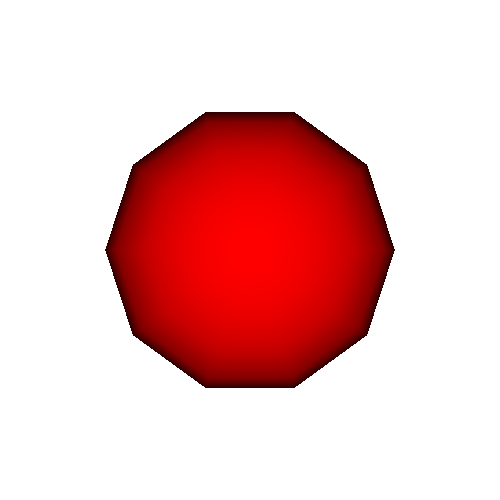

In [3]:
# Original source: http://nbviewer.jupyter.org/gist/certik/5723420
# An explained version of this code: https://pyscience.wordpress.com/2014/09/03/ipython-notebook-vtk/

import vtk
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = bytes(memoryview(writer.GetResult()))
    
    return Image(data)

vtkSourceSphere = vtk.vtkSphereSource()
vtkSourceSphere.SetCenter(0.0, 0.0, 0.0)
vtkSourceSphere.SetRadius(10.0)
vtkSourceSphere.SetPhiResolution(10)
vtkSourceSphere.SetThetaResolution(10)

vtkMapperSphere = vtk.vtkPolyDataMapper()
vtkMapperSphere.SetInputConnection(vtkSourceSphere.GetOutputPort())

vtkActorSphere = vtk.vtkActor()
vtkActorSphere.SetMapper(vtkMapperSphere)
vtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0)

vtkRenderer = vtk.vtkRenderer()
vtkRenderer.SetBackground(1.0, 1.0, 1.0)
vtkRenderer.AddActor(vtkActorSphere)

vtk_show(vtkRenderer, width=500, height=500)